In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("health care diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve

In [ ]:
label_encoder = LabelEncoder()
y_encode = label_encoder.fit_transform(df.Pregnancies)
y_encode
X = df.drop('Pregnancies', axis = 1)

In [ ]:
train_X,  test_X, train_Y, test_Y = train_test_split(X, y_encode, test_size = 0.3, random_state=30)

In [ ]:
train_X.head(2)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
739,102,74,0,0,39.5,0.293,42,1
559,85,74,0,0,30.1,0.300,35,0


In [ ]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy of the model is: ', metrics.accuracy_score(prediction, test_Y))

The accuracy of the model is:  0.18614718614718614


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_Y, prediction)
print('confusion matrix of test data : ' )
print(conf_matrix)

confusion matrix of test data : 
[[11 18  0  1  1  2  0  0  0  0  0  1  0  0  0  0]
 [12 24  1  1  0  1  0  2  1  0  0  0  0  0  0  0]
 [11 15  0  0  0  1  0  0  1  0  0  0  0  0  0  0]
 [11  8  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 6  6  1  0  2  2  0  0  0  1  0  1  0  0  0  0]
 [ 2  6  0  0  2  3  0  0  0  0  0  0  1  0  0  0]
 [ 2  3  1  1  1  3  0  2  1  1  0  1  0  0  0  0]
 [ 2  2  0  0  1  3  0  2  1  0  0  0  0  0  0  0]
 [ 1  6  0  0  1  4  1  0  1  0  0  0  1  0  0  0]
 [ 1  4  0  0  1  3  1  1  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  6  0  1  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  1  0  1  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  1  0  0  0  1  0  0  0  0  0  0]
 [ 0  1  0  0  0  1  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]]


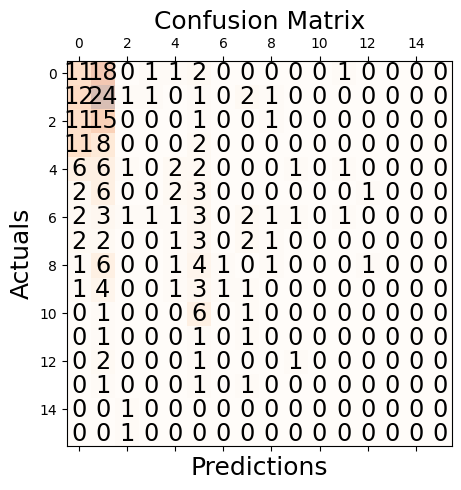

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
precision_score(test_Y, prediction, average=None)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.18644068, 0.24742268, 0.        , 0.        , 0.22222222,
       0.09090909, 0.        , 0.2       , 0.2       , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_train_bin = label_binarize(train_Y, classes=[0, 1, 2])
y_test_bin = label_binarize(test_Y, classes=[0, 1, 2])
n_classes = y_train_bin.shape[1]

n_classes

3

In [ ]:
fpr = {}
tpr = {}
roc_auc = {}

model_roc = LogisticRegression()

In [ ]:
for i in range(n_classes):
    model_roc.fit(train_X, y_train_bin[:, 0])
    y_pred_prob = model_roc.predict_proba(test_X)[:, 1]
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob)
    roc_auc[i] = auc(fpr[i], tpr[i])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

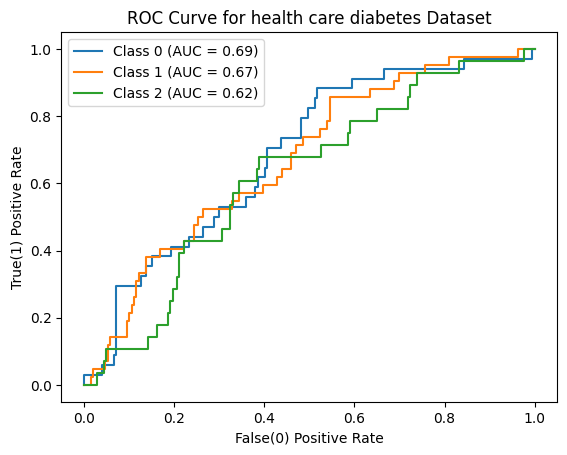

Class 0: ROC AUC = 0.69
Class 1: ROC AUC = 0.67
Class 2: ROC AUC = 0.62


In [ ]:
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))
plt.xlabel('False(0) Positive Rate')
plt.ylabel('True(1) Positive Rate')
plt.title('ROC Curve for health care diabetes Dataset')
plt.legend()
plt.show()

for i in range(n_classes):
    print("Class {}: ROC AUC = {:.2f}".format(i, roc_auc[i]))